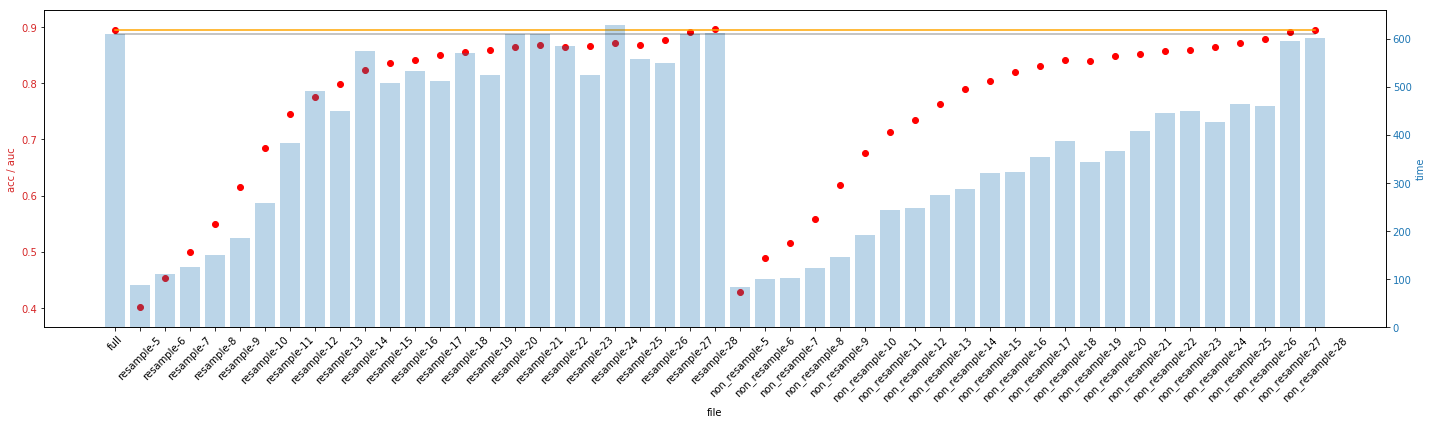

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

x = []
acc = []
auc = []
epoch = []
time = []

neuron_type = 'lstm'

with open(f'./log/full/all.log', 'r') as f:
    log = [v.rstrip('\n') for v in f.readlines()]
x.append('full')
acc.append(float(log[0][15:]))
auc.append(float(log[2][15:]))
epoch.append(float(log[4][15:]))
time.append(float(log[5][14:]))

for i in range(5, 29):
    with open(f'./log/resample_{neuron_type}/segment-1/{i}.all.log', 'r') as f:
        log = [v.rstrip('\n') for v in f.readlines()]
    x.append(f'resample-{i}')
    acc.append(float(log[0][15:]))
    auc.append(float(log[2][15:]))
    epoch.append(float(log[4][15:]))
    # time.append(float(log[5][14:]))
    time.append(float(log[6][18:]))

for i in range(5, 29):
    with open(f'./log/non_resample_{neuron_type}/segment-1/{i}.all.log', 'r') as f:
        log = [v.rstrip('\n') for v in f.readlines()]
    x.append(f'non_resample-{i}')
    acc.append(float(log[0][15:]))
    auc.append(float(log[2][15:]))
    epoch.append(float(log[4][15:]))
    time.append(float(log[5][14:]))

fig, ax1 = plt.subplots(figsize=(20, 6))
color = 'tab:red'
ax1.set_xlabel('file')
for label in ax1.get_xticklabels():
    label.set_rotation(45) 
ax1.set_ylabel('acc / auc', color=color)
ax1.scatter(x, acc, color='red')
ax1.plot(x, [acc[0]]*len(x), color='orange')
# ax1.scatter(x, auc, color='orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('time', color=color)  # we already handled the x-label with ax1
ax2.bar(x, time, color=color, alpha=0.3)
ax2.plot(x, [time[0]]*len(x), color='black', alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
fig.clf()